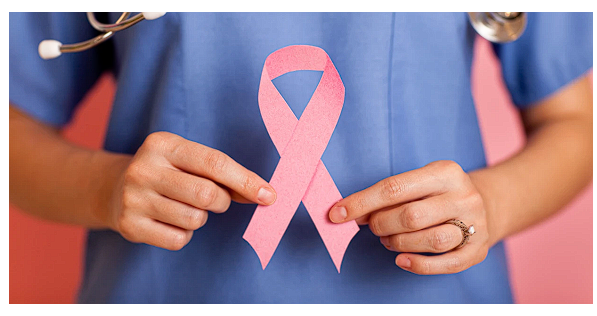

# Haberman Breast Cancer Dataset EDA

_________________________________________________________________________

### DataSet Details

> Age of the Patient at the time of operation.

> Patient's year of operation.

> The Number of positive axillary nodes detected.

> Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("haberman.csv")

In [3]:
data.shape

(306, 4)

In [4]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [6]:
data.drop_duplicates().shape[0]

289

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


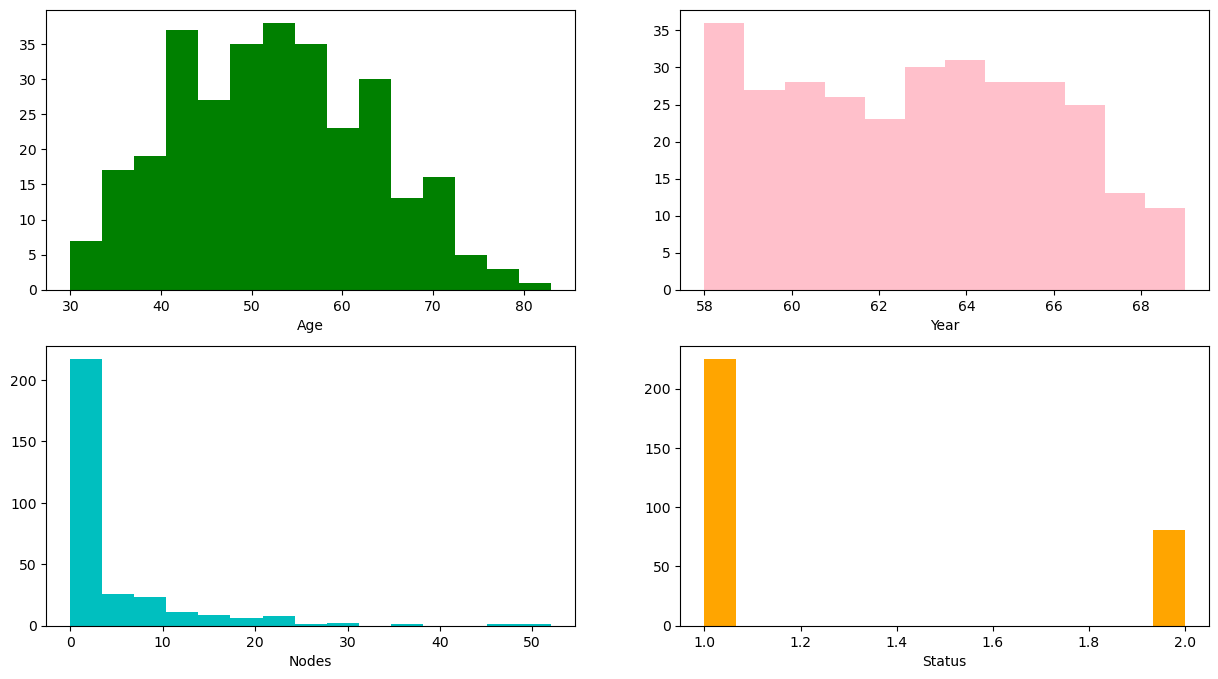

In [9]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.hist(data['age'],bins=15,color='g')
plt.xlabel('Age')

plt.subplot(2,2,2)
plt.hist(data['year'],bins=12,color='pink')
plt.xlabel('Year')


plt.subplot(2,2,3)
plt.hist(data['nodes'],bins=15,color='c',)
plt.xlabel('Nodes')

plt.subplot(2,2,4)
plt.hist(data['status'],bins=15,color='orange')
plt.xlabel('Status')


plt.show()

In [10]:
grp_data=data['status'].value_counts()

grp_data

status
1    225
2     81
Name: count, dtype: int64

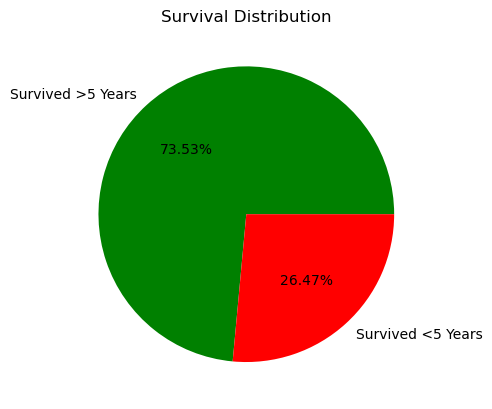

In [11]:
plt.pie(grp_data,labels=['Survived >5 Years','Survived <5 Years'],autopct="%.2f%%",colors=['g','r'])
plt.title("Survival Distribution")
plt.show()


Age

In [12]:
age_cat=[]
for i in range(data.shape[0]):
    if data.iloc[i,0]<41:
        age_cat.append("30 to 40")
    elif data.iloc[i,0]<51:
        age_cat.append("40 to 50")
    elif data.iloc[i,0]<61:
        age_cat.append("50 to 60")
    elif data.iloc[i,0]<71:
        age_cat.append("60 to 70")
    elif data.iloc[i,0]<81:
        age_cat.append("70 to 80")
    else:
        age_cat.append("More than 80")
    
    
    
        

In [13]:
data['Age_Cat']=age_cat

In [14]:
data['Age_Cat'].value_counts()

Age_Cat
40 to 50        93
50 to 60        93
60 to 70        63
30 to 40        43
70 to 80        13
More than 80     1
Name: count, dtype: int64

In [15]:
data[data['Age_Cat']=="Else"]

,age,year,nodes,status,Age_Cat


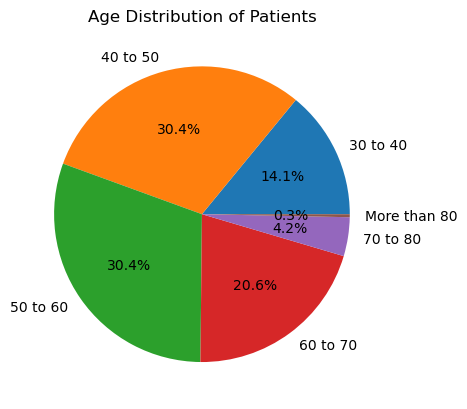

In [34]:
grp_data5=data.groupby('Age_Cat')['year'].count()
plt.pie(grp_data5,labels=grp_data5.index,autopct='%.1f%%')
plt.title("Age Distribution of Patients")
plt.show()

#### 60% Patients were in Age Group of *40 to 60*
#### 80% Patients were in Age Group of *40 to 70*

In [16]:
survived_1=data[data['status']==1]
survived_2=data[data['status']==2]

survived_1['age'].mean()

52.01777777777778

In [17]:
survived_2['age'].mean()

53.67901234567901

#### Average Age of Persons who Survived more than 5 years is 52
#### Average Age of Persons who Survived less than 5 years is 53.5

Difference is not so big but depicts that old age persons have more chance of death.

In [18]:
data['status']=data['status'].map({1:1,2:0})

In [19]:
grp_data2=data.groupby("Age_Cat")['status'].agg(['mean','count'])
grp_data2

,mean,count
Age_Cat,,
30 to 40,0.906977,43
40 to 50,0.688172,93
50 to 60,0.720430,93
60 to 70,0.714286,63
70 to 80,0.769231,13
More than 80,0.000000,1


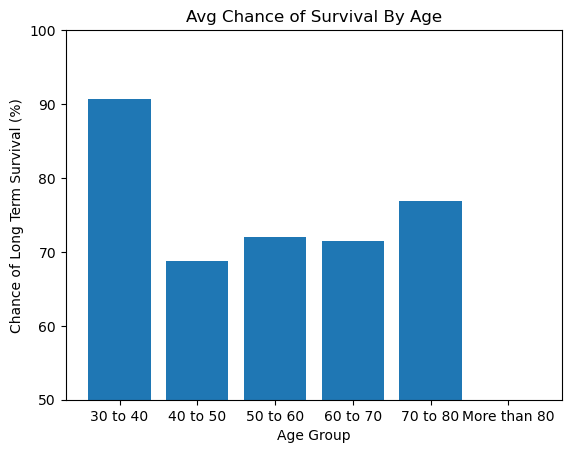

In [20]:
plt.bar(grp_data2.index,grp_data2['mean']*100)
plt.ylim([50,100])
plt.xlabel("Age Group")
plt.ylabel("Chance of Long Term Survival (%)")
plt.title("Avg Chance of Survival By Age")
plt.show()

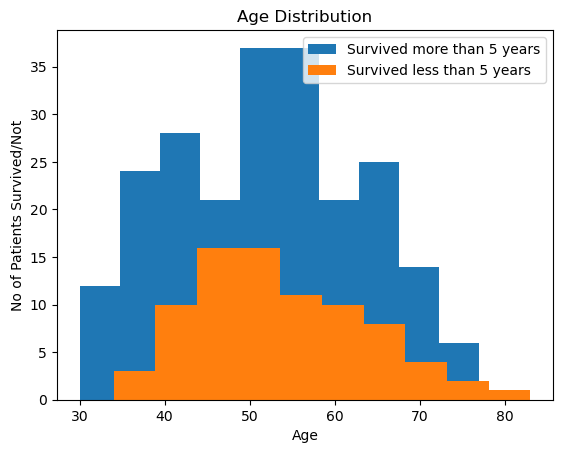

In [21]:
plt.hist(survived_1['age'],label='Survived more than 5 years')
plt.hist(survived_2['age'],label='Survived less than 5 years')
plt.legend()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of Patients Survived/Not")
plt.show()

In [22]:
grp_data3=data.groupby('year')['status'].agg(['mean','count'])
grp_data3

,mean,count
year,,
58,0.666667,36
59,0.666667,27
60,0.857143,28
61,0.884615,26
62,0.695652,23
63,0.733333,30
64,0.741935,31
65,0.535714,28
66,0.785714,28


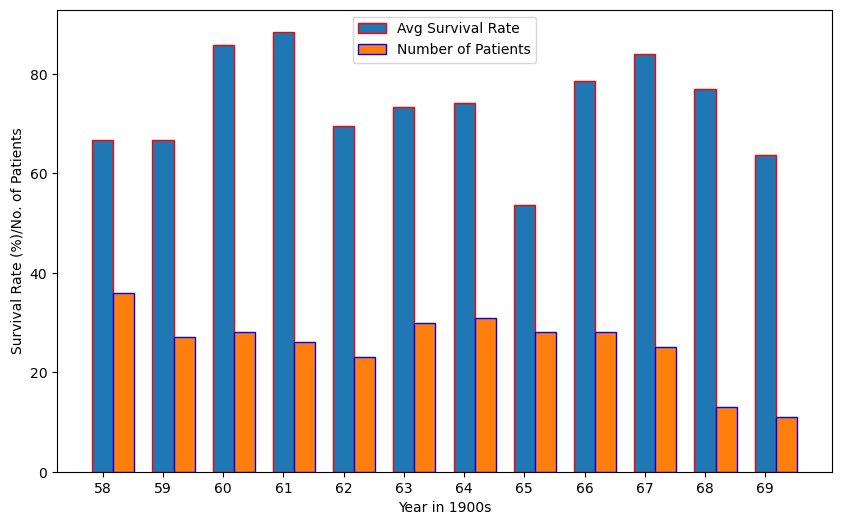

In [23]:
plt.figure(figsize=(10,6))
plt.bar(grp_data3.index,grp_data3['mean']*100,width=0.35,label='Avg Survival Rate',edgecolor='red')
plt.bar(0.35+grp_data3.index,grp_data3['count'],width=0.35,label='Number of Patients',edgecolor='b')
plt.legend()
plt.xticks(grp_data3.index)
plt.xlabel("Year in 1900s")
plt.ylabel("Survival Rate (%)/No. of Patients")
plt.show()

In [24]:
data.nodes.describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

In [25]:
nodes_cat_l=[]

for i in range(data.shape[0]):
    v=data.iloc[i,2]
    if v<5:
        nodes_cat_l.append(str(v))
    elif v>=5 and v<10:
        nodes_cat_l.append('5 to 10')
    elif v>9 and v<=15:
        nodes_cat_l.append('10 to 15')
    elif v>15 and v<=20:
        nodes_cat_l.append('15 to 20')
    elif v>20 and v<=25:
        nodes_cat_l.append('20 to 25')
    elif v>25:
        nodes_cat_l.append('25+')
    else:
        nodes_cat_l.append("Error")



    

In [26]:
data['nodes_cat']=nodes_cat_l

In [27]:
data.nodes_cat.value_counts()

nodes_cat
0           136
1            41
5 to 10      33
10 to 15     21
3            20
2            20
4            13
20 to 25      9
15 to 20      8
25+           5
Name: count, dtype: int64

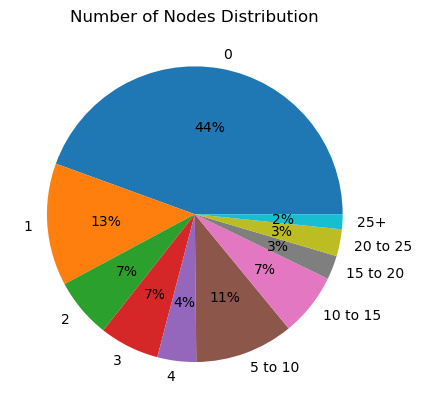

In [40]:
grp_data56=data.nodes_cat.value_counts()
grp_data56=grp_data56[['0', '1', '2', '3', '4','5 to 10','10 to 15', '15 to 20','20 to 25', '25+']]
plt.pie(grp_data56,labels=grp_data56.index,autopct='%.f%%')
plt.title("Number of Nodes Distribution")
plt.show()

## More than half (57%) of the patients have 0 or 1 nodes.

#### After doing some research, I found that :

**if nodes=0:** 

No cancer cells are found in the lymph nodes, that cancer is referred to as node-negative. This generally indicates a lower stage of cancer and a better prognosis, as the cancer is less likely to have spread.
_____________________________________
**if nodes>0:**

Involvement of fewer lymph nodes generally suggests a better prognosis compared to a higher number of affected nodes.

A higher number of affected lymph nodes typically indicates a more advanced stage of cancer and may be associated with a higher risk of recurrence and a lower overall survival rate.

In [28]:
grp_data4=data.groupby('nodes_cat')['status'].mean()
grp_data4=grp_data4[['0', '1', '2', '3', '4','5 to 10','10 to 15', '15 to 20','20 to 25', '25+']]

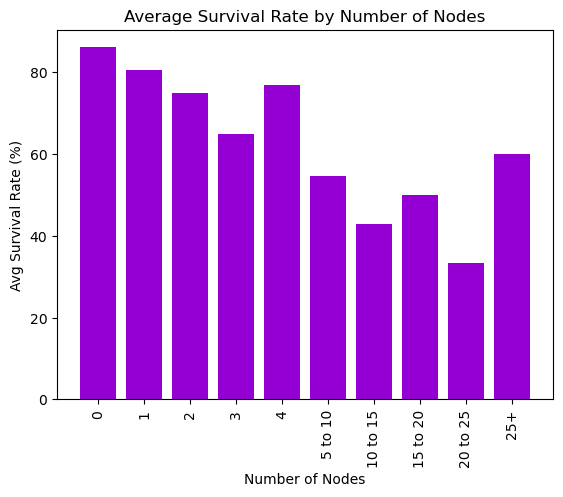

In [29]:
plt.bar(grp_data4.index,grp_data4*100,color='darkviolet')
plt.xticks(['0', '1', '2', '3', '4','5 to 10','10 to 15', '15 to 20','20 to 25', '25+'],rotation=90)
plt.title("Average Survival Rate by Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Avg Survival Rate (%)")
plt.show()

### This chart clearly shows that number of nodes have a negative correlation with chance of survival.

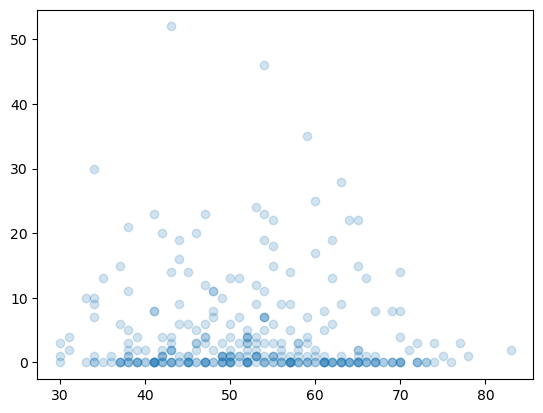

In [45]:
plt.scatter(data['age'],data['nodes'],alpha=0.2)

### Nodes are not related with Age

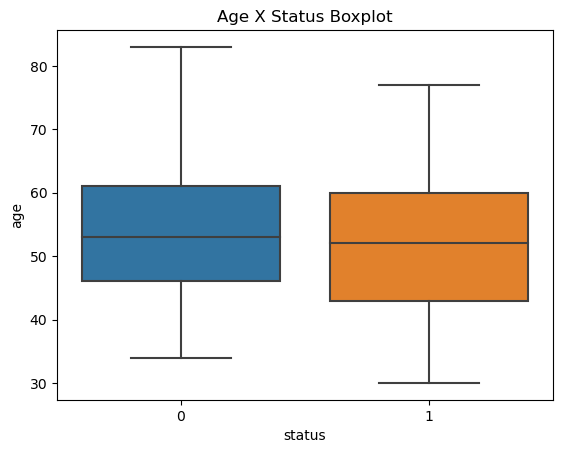

In [59]:
sns.boxplot(x=data['status'],y=data['age'])
plt.title("Age X Status Boxplot")
plt.show()

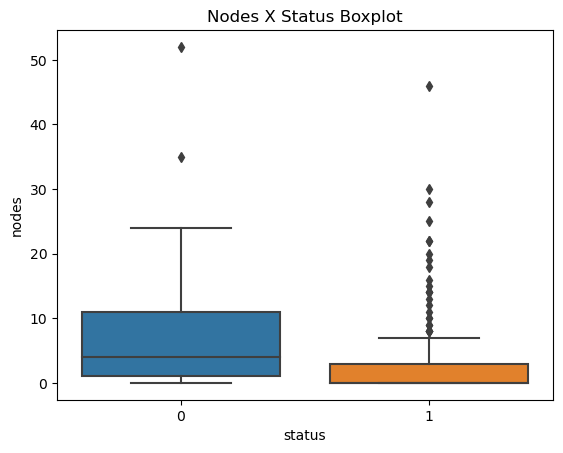

In [60]:
sns.boxplot(x=data['status'],y=data['nodes'])
plt.title("Nodes X Status Boxplot")
plt.show()

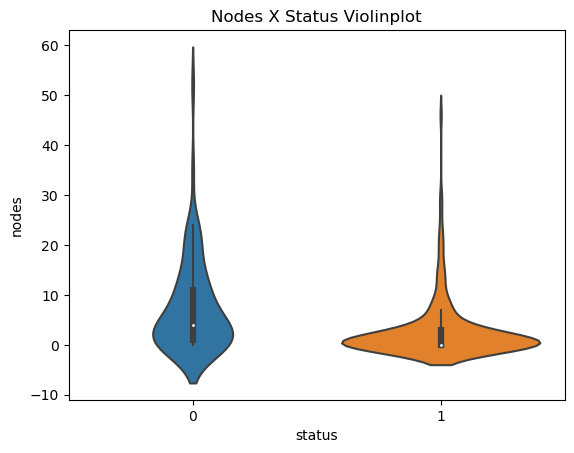

In [61]:
sns.violinplot(x=data['status'],y=data['nodes'])
plt.title("Nodes X Status Violinplot")
plt.show()

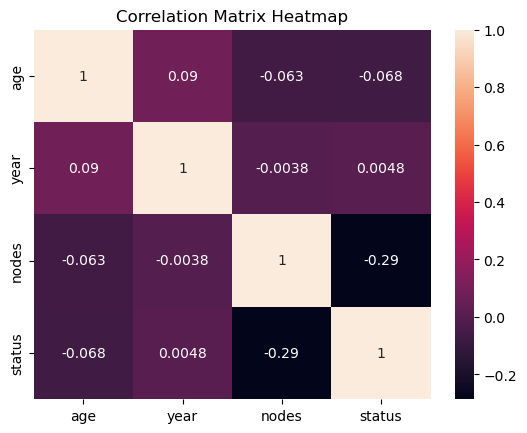

In [62]:
sns.heatmap(data[['age', 'year', 'nodes', 'status']].corr(),annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Findings and Insights

1. **Data Overview**:
   - The dataset contains 300 data points with the following columns: age of patient, year of surgery, number of nodes detected, and survival status (1 if the patient survived more than 5 years after surgery, 2 if not).

<br>

2. **Age Distribution**:
   - The age of patients is almost normally distributed and symmetrical.

<br>


3. **Survival Rate**:
   - The overall survival rate is 73.5%.

<br>

4. **Age Group Analysis**:
   - 60% of the patients were in the age group of 40 to 60 years.
   - 80% of the patients were in the age group of 40 to 70 years.

<br>

5. **Average Age**:
   - The average age of patients who survived more than 5 years is 52.
   - The average age of patients who survived less than 5 years is 53.5.

<br>

6. **Survival Rate by Age Category**:
   - The highest survival rate by age category is 90%, with other age categories having a survival rate around 70%.

<br>

7. **Node Analysis**:
   - More than half (57%) of the patients have 0 or 1 node detected.
   - There is no significant relation between the number of nodes and the age of patients.
   - Patients with 0 or 1 node have more than an 80% average survival rate, while patients with 20 to 25 nodes have less than a 40% chance of surviving for 5 years or more.

<br>

8. **Correlation between Nodes and Survival**:
   - There is a negative correlation between the number of nodes detected and the chance of survival.

---